# Contents

1.	Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.
2.	Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.
3.	The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
    o	Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
    o	Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)
4.	The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.
5.	The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)
6.	Create an appropriate visualization to show the distribution of profiles.
7.	Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
8.	Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
9.	Produce suitable charts to illustrate your results and export them in your project folder.


# 01 Importing Libraries, Path, Files

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define path
path = r'C:\Users\heidi\Desktop\Instacart Basket Analysis 01-09-2022'

In [3]:
# import combined file
df_poc = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products__customers_merged.4.9.pkl'))

# 02 Task Steps and Questions

## 2 Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [7]:
df_poc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   eval_set                object  
 3   order_number            int64   
 4   orders_day_of_week      int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15  price_range_loc         object  
 16  busiest_day             object  
 17  busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  avg_or

For PII, we have removed names from the customer info, but family status, age, number of dependents, gender, and income remain. 

## 3 The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
    ### Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
    ### Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [8]:
#separate states into regions
df_poc.loc[df_poc['state'] == 'Maine', 'region'] = 'Northeast'
df_poc.loc[df_poc['state'] == 'New Hampshire', 'region'] = 'Northeast'
df_poc.loc[df_poc['state'] == 'Vermont', 'region'] = 'Northeast'
df_poc.loc[df_poc['state'] == 'Massachusetts', 'region'] = 'Northeast'
df_poc.loc[df_poc['state'] == 'Rhode Island', 'region'] = 'Northeast'
df_poc.loc[df_poc['state'] == 'Connecticut', 'region'] = 'Northeast'
df_poc.loc[df_poc['state'] == 'New York', 'region'] = 'Northeast'
df_poc.loc[df_poc['state'] == 'Pennsylvania', 'region'] = 'Northeast'
df_poc.loc[df_poc['state'] == 'New Jersey', 'region'] = 'Northeast'

In [9]:
df_poc.loc[df_poc['state'] == 'Wisconsin', 'region'] = 'Midwest'
df_poc.loc[df_poc['state'] == 'Michigan', 'region'] = 'Midwest'
df_poc.loc[df_poc['state'] == 'Illinois', 'region'] = 'Midwest'
df_poc.loc[df_poc['state'] == 'Indiana', 'region'] = 'Midwest'
df_poc.loc[df_poc['state'] == 'Ohio', 'region'] = 'Midwest'
df_poc.loc[df_poc['state'] == 'North Dakota', 'region'] = 'Midwest'
df_poc.loc[df_poc['state'] == 'South Dakota', 'region'] = 'Midwest'
df_poc.loc[df_poc['state'] == 'Nebraska', 'region'] = 'Midwest'
df_poc.loc[df_poc['state'] == 'Kansas', 'region'] = 'Midwest'
df_poc.loc[df_poc['state'] == 'Minnesota', 'region'] = 'Midwest'
df_poc.loc[df_poc['state'] == 'Iowa', 'region'] = 'Midwest'
df_poc.loc[df_poc['state'] == 'Missouri', 'region'] = 'Midwest'

In [10]:
df_poc.loc[df_poc['state'] == 'Delaware', 'region'] = 'South'
df_poc.loc[df_poc['state'] == 'Maryland', 'region'] = 'South'
df_poc.loc[df_poc['state'] == 'District of Columbia', 'region'] = 'South'
df_poc.loc[df_poc['state'] == 'Virginia', 'region'] = 'South'
df_poc.loc[df_poc['state'] == 'West Virginia', 'region'] = 'South'
df_poc.loc[df_poc['state'] == 'North Carolina', 'region'] = 'South'
df_poc.loc[df_poc['state'] == 'South Carolina', 'region'] = 'South'
df_poc.loc[df_poc['state'] == 'Georgia', 'region'] = 'South'
df_poc.loc[df_poc['state'] == 'Florida', 'region'] = 'South'
df_poc.loc[df_poc['state'] == 'Kentucky', 'region'] = 'South'
df_poc.loc[df_poc['state'] == 'Tennessee', 'region'] = 'South'
df_poc.loc[df_poc['state'] == 'Mississippi', 'region'] = 'South'
df_poc.loc[df_poc['state'] == 'Alabama', 'region'] = 'South'
df_poc.loc[df_poc['state'] == 'Oklahoma', 'region'] = 'South'
df_poc.loc[df_poc['state'] == 'Texas', 'region'] = 'South'
df_poc.loc[df_poc['state'] == 'Arkansas', 'region'] = 'South'
df_poc.loc[df_poc['state'] == 'Louisiana', 'region'] = 'South'

In [11]:
df_poc.loc[df_poc['state'] == 'Idaho', 'region'] = 'West'
df_poc.loc[df_poc['state'] == 'Montana', 'region'] = 'West'
df_poc.loc[df_poc['state'] == 'Wyoming', 'region'] = 'West'
df_poc.loc[df_poc['state'] == 'Nevada', 'region'] = 'West'
df_poc.loc[df_poc['state'] == 'Utah', 'region'] = 'West'
df_poc.loc[df_poc['state'] == 'Colorado', 'region'] = 'West'
df_poc.loc[df_poc['state'] == 'Arizona', 'region'] = 'West'
df_poc.loc[df_poc['state'] == 'New Mexico', 'region'] = 'West'
df_poc.loc[df_poc['state'] == 'Alaska', 'region'] = 'West'
df_poc.loc[df_poc['state'] == 'Washington', 'region'] = 'West'
df_poc.loc[df_poc['state'] == 'Oregon', 'region'] = 'West'
df_poc.loc[df_poc['state'] == 'California', 'region'] = 'West'
df_poc.loc[df_poc['state'] == 'Hawaii', 'region'] = 'West'

In [12]:
# check the values
df_poc['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

## 3b Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [13]:
# create a cross tab to regions vs spending
crosstab = pd.crosstab(df_poc['region'], df_poc['spend_flag'], dropna = False)

In [14]:
crosstab.to_clipboard()

## 4 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [15]:
# create new df based on max_order <5
df_poc2 = df_poc[df_poc['max_order'] >= 5]

In [16]:
#check output
df_poc2

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_freq,freq_flag,gender,state,age,date_joined,dependents,fam_status,income,region
0,2539329,1,prior,1,2,8,0.0,196,1,0,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,prior,3,3,12,21.0,196,1,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,prior,5,4,15,28.0,196,1,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404850,3308056,106143,prior,22,4,20,10.0,19675,1,1,...,6.5,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West
32404851,2988973,106143,prior,23,2,22,5.0,19675,1,1,...,6.5,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West
32404852,930,106143,prior,24,6,12,4.0,19675,1,1,...,6.5,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West
32404853,467253,106143,prior,25,6,16,7.0,19675,1,1,...,6.5,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West


In [17]:
# check output by comparing shape of original and new
df_poc.shape

(32404859, 33)

In [18]:
df_poc2.shape

(30964564, 33)

In [19]:
#export
df_poc2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'poc2_excl_cust_w_under_5.pkl'))

## 05 The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [20]:
# join with original data to get department name
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [21]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [22]:
# join the dfs
df_poc3 = df_poc2.merge(df_dept, on = ['department_id'])

In [23]:
df_poc3

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,freq_flag,gender,state,age,date_joined,dependents,fam_status,income,region,department
0,2539329,1,prior,1,2,8,0.0,196,1,0,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30964559,525976,58201,prior,24,6,16,3.0,5161,1,1,...,Regular customer,Male,Florida,75,2/8/2019,2,married,138066,South,bulk
30964560,758290,58201,prior,26,0,12,9.0,5161,1,1,...,Regular customer,Male,Florida,75,2/8/2019,2,married,138066,South,bulk
30964561,460711,58201,prior,27,6,9,13.0,5161,1,1,...,Regular customer,Male,Florida,75,2/8/2019,2,married,138066,South,bulk
30964562,1605789,58201,prior,28,5,7,27.0,5161,1,1,...,Regular customer,Male,Florida,75,2/8/2019,2,married,138066,South,bulk


In [24]:
# define characteristics of Young Parent
df_poc3.loc[(df_poc3['age'] >= 18) & (df_poc3['age'] < 35) & (df_poc3['dependents'] > 0), 'profile'] = 'Young Parent'

In [37]:
# define characteristics of Single Adult
df_poc3.loc[(df_poc3['age'] >= 18) & (df_poc3['age'] < 35) & (df_poc3['dependents'] == 0), 'profile'] = 'Single Adult'

In [38]:
# define characteristics of Married Adult
df_poc3.loc[(df_poc3['fam_status'] == "married") & (df_poc3['age'] >= 35)  & (df_poc3['department_id'] == 10), 'profile'] = 'Married Adult'

In [39]:
# check the outcome
df_poc3['profile'].value_counts(dropna = False)

Married Adult    17046146
Single Adult      7739681
Young Parent      6178737
Name: profile, dtype: int64

## 6 Create an appropriate visualization to show the distribution of profiles.

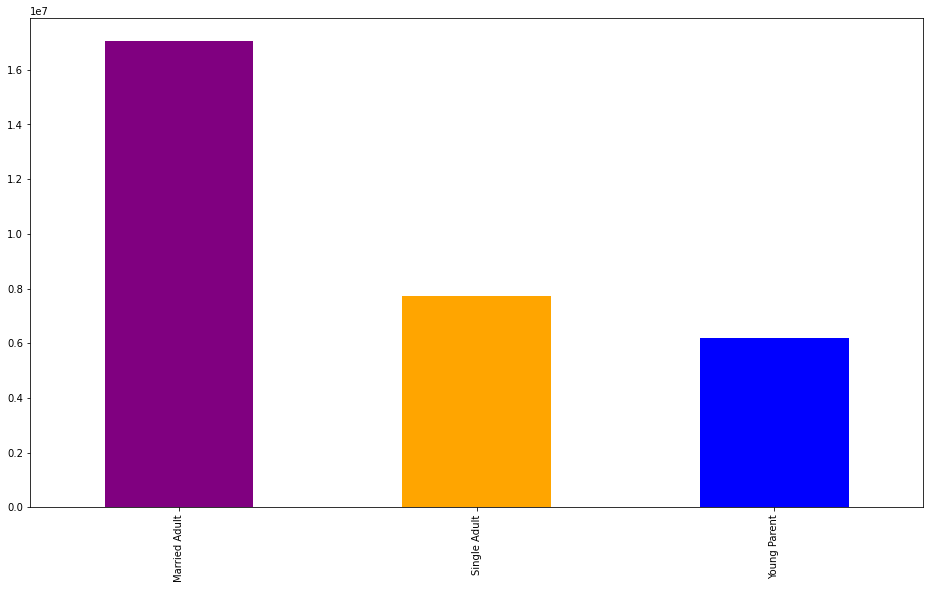

In [43]:
# creating bar chart
plt.figure(figsize=(16,9))
profile_pie = df_poc3['profile'].value_counts(dropna = False).sort_index().plot.bar(color = ['purple', 'orange', 'blue'])

In [44]:
# export fig
profile_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profile_pie.png'))

## 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [41]:
# using groupby with order frequency to aggregate mean, max, min
df_poc3.groupby('profile').agg({'order_freq' : ['mean', 'min', 'max']})

order_freq           
                    mean  min   max
profile                            
Married Adult   9.349716  0.0  30.0
Single Adult    9.316159  0.0  30.0
Young Parent    9.331854  0.0  30.0

In [42]:
# using groupby with expenditure to aggregate mean, max, min
df_poc3.groupby('profile').agg({'max_order' : ['mean', 'min', 'max']})

max_order        
                    mean min max
profile                         
Married Adult  34.298471   5  99
Single Adult   34.675839   5  99
Young Parent   34.463310   5  99

## 8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [18]:
df_poc3 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'poc3.2.24.22.pkl'))

In [19]:
# make df with only needed columns
df2 = df_poc3[['region', 'department', 'profile']]

In [32]:
# groupby
pd.options.display.max_rows = None

group = df2.groupby(['region', 'department', 'profile'])['region'].count()

In [33]:
group

region     department       profile      
Midwest    alcohol          Married Adult      17035
                            Single Adult        9531
                            Young Parent        7477
           babies           Married Adult      51735
                            Single Adult       24708
                            Young Parent       19298
           bakery           Married Adult     144906
                            Single Adult       66570
                            Young Parent       50277
           beverages        Married Adult     330839
                            Single Adult      149093
                            Young Parent      119047
           breakfast        Married Adult      85907
                            Single Adult       39293
                            Young Parent       30955
           bulk             Married Adult       4517
                            Single Adult        1764
                            Young Parent        1648
    

## 9 Produce suitable charts to illustrate your results and export them in your project folder.

In [15]:
#get sample data
np.random.seed(4)

In [20]:
#create sample
dev = np.random.rand(len(df2)) <= 0.7

In [21]:
#check output
dev

array([False,  True, False, ...,  True,  True,  True])

In [22]:
# create small dfs of smaple data
big = df2[dev]

In [23]:
small = df2[~dev]

In [24]:
# check output
len(df2)

30964564

In [25]:
len(big) + len(small)

30964564

Text(0, 0.5, 'department')

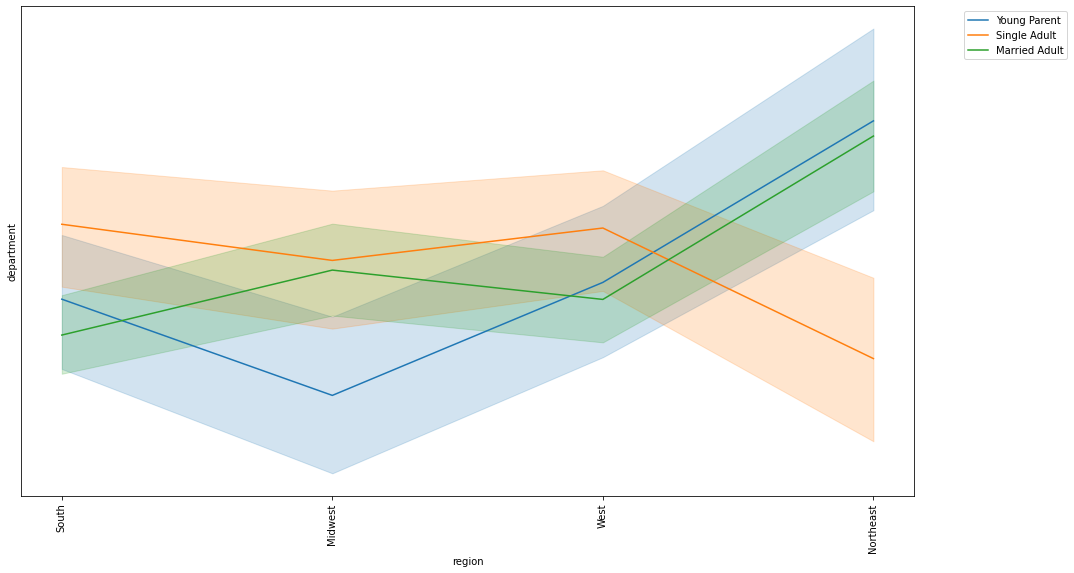

In [27]:
#line chart
plt.figure(figsize=(16,9))
groupline = sns.lineplot(data = small, x = 'region', y = 'department', hue = 'profile')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90) 
plt.yticks() 
plt.xlabel('region')
plt.ylabel('department')

In [ ]:
# export file
df_poc3.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'poc3.2.26.22.pkl'))

In [28]:
# export fig
groupline.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'groupline2.png'))

In [ ]:
#export files
df2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df2.2.26.22.pkl'))

In [4]:
# import file
df_poc4 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'poc3.2.26.22.pkl'))

In [5]:
# create crosstab of loyalty vs spending
cross = pd.crosstab(df_poc4['loyalty_flag'], df_poc['spend_flag'], dropna = False)

In [7]:
cross.to_clipboard()

In [8]:
# get total values
df_poc4['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64

In [9]:
# create crosstab of loyalty vs spending
cross = pd.crosstab(df_poc4['loyalty_flag'], df_poc['order_freq'], dropna = False)

In [10]:
cross.to_clipboard()

In [11]:
# create crosstab of loyalty vs frequency
crosstab1 = pd.crosstab(df_poc4['loyalty_flag'], df_poc['freq_flag'], dropna = False)

In [12]:
crosstab1.to_clipboard()

In [13]:
# create crosstab of region vs frequency
crosstab2 = pd.crosstab(df_poc4['region'], df_poc['freq_flag'], dropna = False)

In [14]:
crosstab2.to_clipboard()

In [29]:
# create crosstab of profile vs frequency
crosstab3 = pd.crosstab(df_poc4['profile'], df_poc['freq_flag'], dropna = False)

In [30]:
crosstab3.to_clipboard()

In [34]:
group.to_clipboard()

In [35]:
# crosstab of loyalty vs profile
crosstab4 = pd.crosstab(df_poc4['profile'], df_poc['loyalty_flag'], dropna = False)

In [36]:
crosstab4.to_clipboard()

In [37]:
#export files
df2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df2.2.27.22.pkl'))

In [39]:
#export files
df_poc4.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'dfpoc42.2.27.22.pkl'))